# Basic of clusters analysis

## Import the relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

## plot the data

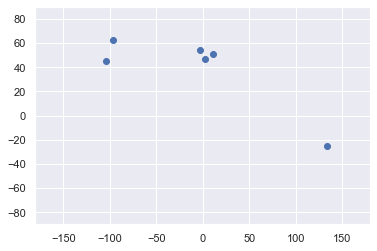

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Select the features

In [5]:
x = data.iloc[:, 1:3]
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

## Clustering 

In [6]:
kmeans = KMeans(3) # 3 représente le nombre de clusters que nous voulons créer 

In [7]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results 

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

#### Output : array([0, 0, 0, 0, 0, 1], dtype=int32)
la sortie nous motre bien deux clusters indiqué par 0 et 1.

On peut clairement voir que les 5 premières observations sont dans le même cluster (0) et la dernière observation dans le deuxième cluster (1).

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        1
1     Canada     62.40     -96.80  English        1
2     France     46.75       2.40   French        0
3         UK     54.01      -2.53  English        0
4    Germany     51.15      10.40   German        0
5  Australia    -25.45     133.11  English        2

##### Diagramme de dispersions
Y = longitude & x = latitude

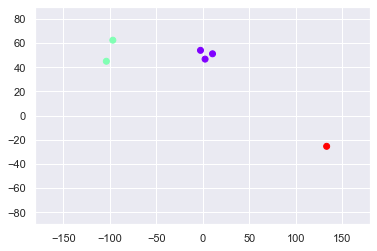

In [10]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### Within-cluster sum of squares: WCSS

In [11]:
kmeans.inertia_

288.1052333333333

In [12]:
wcss=[]

for i in range(1,7):
    kmeans =  KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [13]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

In [19]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title("The Eblow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-clusters sum of squares")

Text(0, 0.5, 'Within-clusters sum of squares')